In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
data_dir = '/data/rongsh/data/VOCSBD/VOC2012/'

In [10]:
annFile = data_dir + 'voc2012_train_aug_cocostyle.json'
#annFile = data_dir + 'voc2012_train_aug_cocostyle.json'
coco = COCO(annFile)

loading annotations into memory...
Done (t=7.68s)
creating index...
index created!


In [11]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
aeroplane bicycle bird boat bottle bus car cat chair cow diningtable dog horse motorbike person pottedplant sheep sofa train tvmonitor

COCO supercategories: 
none


{'file_name': '2010_004141.jpg', 'height': 304, 'width': 500, 'id': 8493}


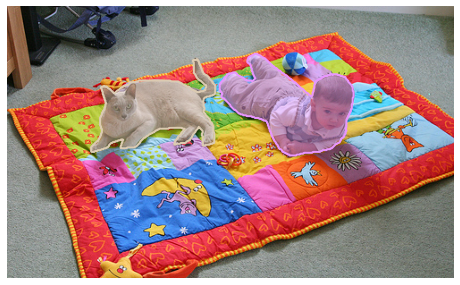

In [14]:
# load and display instance annotations
catIds = coco.getCatIds(catNms=['cat','person'])
imgIds = coco.getImgIds(catIds=catIds)
#imgIds = coco.getImgIds(imgIds=[1])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(img)
I = io.imread(data_dir + 'JPEGImages/' + img['file_name'])
#img = coco.loadImgs('2007_000032')[0]
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
#print(annIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)